# Exploration

The data used in this notebook were found online on Free Internet Chess Server (FICS) https://www.ficsgames.org/download.html

Before exploring the data, we need to figure out how the chess library in Python works.

In [1]:
# importing the needed libraries
import pandas as pd 
import chess.pgn
import chess

* Checking how many lines the .pgn file has

In [2]:
! wc -l ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

 19191183 /Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn


* Taking a look at the format of the data, to figure out what we need and what not for our analysis

In [3]:
! head -20 ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

* Counting how many times the word 'FICSGamesDBGameNo' appears in the file, which indicates 

In [4]:
! grep FICSGamesDBGameNo ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn | wc -l

  955855


As we can observe there are 955,855 games for January 2017. 

In [5]:
# reading in the data
pgn = open("/Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn")

In order to run our analysis faster we are going to get a subset of data.

In [21]:
first_game = chess.pgn.read_game(pgn)

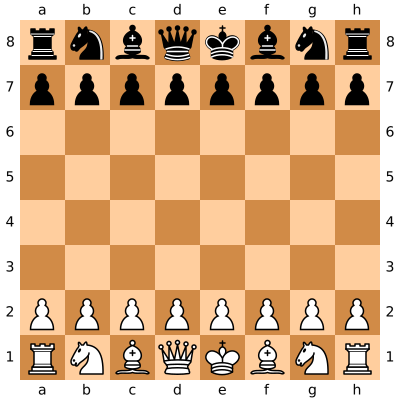

In [22]:
first_game.board()

In [23]:
for move in first_game.main_line():
    print move

d2d4
d7d5
b1c3
g8f6
c1f4
e7e6
f2f3
f8b4
e2e3
e8g8
f4g3
b8c6
f3f4
f6e4
g1e2
b4a5
d1d3
c6b4
d3d1
b4c6
d1d3
c8d7
a2a3
d8f6
e1c1
f6f5
g3e1
f5g6
h2h3
a7a6
g2g4
a8d8
f1g2
e4c3
e2c3
g6d3
d1d3
a5b6
c3a4
c6e5
f4e5
d7a4
c2c3
a4b5
d3d1
b5e2
d1d2
e2c4
c1c2
c7c5
a3a4
c5d4
e3d4
a6a5
e1h4
d8c8
g2f1
b6d8
h4d8
f8d8
d2f2
b7b6
b2b3
c4f1
h1f1
c8c7
g4g5
g7g6
h3h4
d8c8
f2f3
g8g7
f1e1
h7h6
f3h3
c8h8
g5h6
h8h6
e1h1
h6h5
h3f3
h5f5
f3h3
f5f2
c2d3
f2b2
h4h5
b2b3
d3c2
b3b4
h5g6
b4a4
g6f7
c7f7
h3h7
g7f8
h7f7
f8f7
h1h7
f7g6
h7b7
a4a2
c2b3
a2g2
b7b6
g6f5
b6a6
g2f2
a6a5
f5e4
a5a6
e4f5
a6a8
f2f4
a8e8
f4h4
e8f8
f5g5
f8f6
h4h6
f6h6
g5h6
c3c4
h6g5
c4c5
g5f4
c5c6
f4e4
c6c7
e4d4
c7c8q


In [24]:
# creating a list of the first 10000 games
# events = []
# for i in range(1,10001):
#     first_game = chess.pgn.read_game(pgn)
#     events.append(first_game.headers["FICSGamesDBGameNo"])

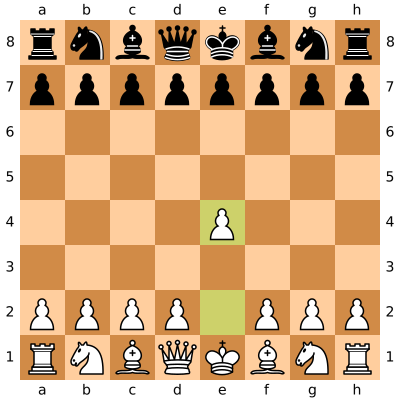

In [25]:
board = chess.Board()
board.push_san("e4")
board

### Important stuff start here

In [13]:
first_game = chess.pgn.read_game(pgn)
board = chess.Board()

In [14]:
moves = first_game.main_line()
first_game.board().variation_san(moves)

'1. b3 e6 2. Bb2 d5 3. e3 f5 4. Nc3 Nf6 5. Bb5+ c6 6. Be2 Bd6 7. Nf3 e5 8. O-O O-O 9. d3 h6 10. Qd2 Be6 11. Nd1 Nbd7 12. c4 Rc8 13. cxd5 cxd5 14. e4 d4 15. exf5 Bxf5 16. Nh4 Bh7 17. f4 Nd5 18. Nf3 Rxf4 19. Nf2 Ne3 20. Rfe1 Rc2 21. Qa5 Qxa5 22. Bc1 Rxe2 23. Bxe3 Rxe3 24. Rxe3 dxe3 25. Ne4 Bxe4 26. dxe4 Rxf3 27. gxf3 Qd2 28. Rd1 Qf2+ 29. Kh1 e2'

Printing the move and the board for one game

In [15]:
first_game.headers["Result"]

'0-1'

### The best thing I figured out thus far

Notes:
- When there are a lot of moves, the following doesn't show until the check mate, wierd

In [16]:
node = first_game
while node.variations:
    next_node = node.variation(0)
#     print(next_node)

    print(next_node.move)  #prints the origin square and the destination square
    b = next_node.move.to_square
#     print(b)
    a = node.board().san(next_node.move)[-2:]
    print(a)
    board.push_san(node.board().san(next_node.move))
    print(board.piece_at(next_node.move.to_square))  #prints the piece that was moved
    
    print(board)
    
    print(board.is_game_over())
    node = next_node

b2b3
b3
P
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. P . . . . . .
P . P P P P P P
R N B Q K B N R
False
e7e6
e6
p
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . . . . . .
. P . . . . . .
P . P P P P P P
R N B Q K B N R
False
c1b2
b2
B
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . . . . . .
. P . . . . . .
P B P P P P P P
R N . Q K B N R
False
d7d5
d5
p
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . p . . . .
. . . . . . . .
. P . . . . . .
P B P P P P P P
R N . Q K B N R
False
e2e3
e3
P
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . p . . . .
. . . . . . . .
. P . . P . . .
P B P P . P P P
R N . Q K B N R
False
f7f5
f5
p
r n b q k b n r
p p p . . . p p
. . . . p . . .
. . . p . p . .
. . . . . . . .
. P . . P . . .
P B P P . P P P
R N . Q K B N R
False
b1c3
c3
N
r n b q k b n r
p p p . . . p p
. . . . p . . .
. . . p . p . .
. . . . . . . .
. P N . P . . .
P B P P . P P P
R . . Q K B N 

In [120]:
chess.D4

27

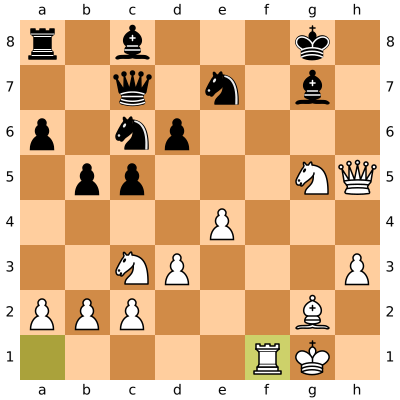

In [10]:
board

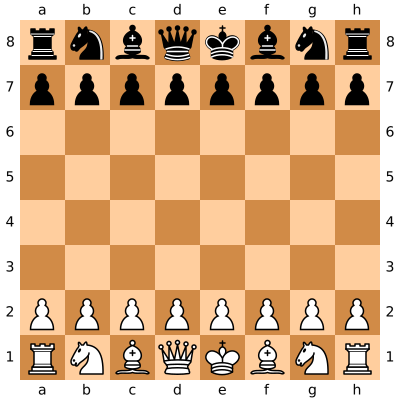

In [13]:
first_game.board()

In [42]:
second_game = chess.pgn.read_game(pgn)
board = chess.Board()
moves = second_game.main_line()
second_game.board().variation_san(moves)
node = second_game
while node.variations:
    next_node = node.variation(0)
    print(node.board().san(next_node.move))
    board.push_san(node.board().san(next_node.move))
    print(board)
    node = next_node

d4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
e5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
c3
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . P . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
exd4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . p . . . .
. . P . . . . .
P P . . P P P P
R N B Q K B N R
cxd4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
Nf6
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
Nf3
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . N . .
P P . . P P P P
R N B Q K B . R
d5
r n b q k b . r
p p p . . p p p
. . . . . n . .
. . . p . . . .
. . . P . 

Following there is an example of how to print a hierarchical chart 
https://plot.ly/python/tree-plots/

another example in this link: https://plot.ly/~empet/14305/a-tree-with-improved-walker-layout-1/#plot

## Trying to create the list to viz

In [9]:
first_game = chess.pgn.read_game(pgn)
board = chess.Board()
moves = first_game.main_line()
node = first_game
while node.variations:
    next_node = node.variation(0)
#     print(next_node)

    print(next_node.move)  #prints the origin square and the destination square
    b = next_node.move.to_square
#     print(b)
    a = node.board().san(next_node.move)[-2:]
    print(a)
    board.push_san(node.board().san(next_node.move))
    print(board.piece_at(next_node.move.to_square))  #prints the piece that was moved
    
    print(board)
    
    print(board.is_game_over())
    node = next_node

e2e4
e4
P
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
False
c7c5
c5
p
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
False
f2f4
f4
P
r n b q k b n r
p p . p p p p p
. . . . . . . .
. . p . . . . .
. . . . P P . .
. . . . . . . .
P P P P . . P P
R N B Q K B N R
False
b8c6
c6
n
r . b q k b n r
p p . p p p p p
. . n . . . . .
. . p . . . . .
. . . . P P . .
. . . . . . . .
P P P P . . P P
R N B Q K B N R
False
g1f3
f3
N
r . b q k b n r
p p . p p p p p
. . n . . . . .
. . p . . . . .
. . . . P P . .
. . . . . N . .
P P P P . . P P
R N B Q K B . R
False
d7d6
d6
p
r . b q k b n r
p p . . p p p p
. . n p . . . .
. . p . . . . .
. . . . P P . .
. . . . . N . .
P P P P . . P P
R N B Q K B . R
False
d2d3
d3
P
r . b q k b n r
p p . . p p p p
. . n p . . . .
. . p . . . . .
. . . . P P . .
. . . P . N . .
P P P . . . P P
R N B Q K B . 

In [79]:
initial_list = []
for i in range(10):
    first_game = chess.pgn.read_game(pgn)
    board = chess.Board()
    moves = first_game.main_line()
    node = first_game
    a = 0
    list1 = []
    while node.variations:
        next_node = node.variation(0)
        b = str(next_node.move)[-2:]
        list1.append((a,b))
        a = b
        board.push_san(node.board().san(next_node.move))
        node = next_node
        if len(list1) > 3: 
            break
#     print(len(list1))
    initial_list = initial_list + [i for i in list1 if i not in initial_list]

In [80]:
initial_list

[(0, 'e4'),
 ('e4', 'e5'),
 ('e5', 'f3'),
 ('f3', 'c6'),
 (0, 'd4'),
 ('d4', 'e5'),
 ('e5', 'd5'),
 ('d5', 'e4'),
 (0, 'e3'),
 ('e3', 'e5'),
 ('e5', 'b3'),
 ('b3', 'e4'),
 ('e4', 'e6'),
 ('e6', 'f3'),
 ('f3', 'd5'),
 ('e6', 'b5'),
 ('b5', 'f6'),
 ('e4', 'd6'),
 ('d6', 'd4'),
 ('d4', 'f6'),
 (0, 'g3'),
 ('g3', 'd5'),
 ('d5', 'g2'),
 ('g2', 'c6'),
 ('d4', 'd5'),
 ('d5', 'f3'),
 ('f3', 'f6')]

In [76]:
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx
import matplotlib.pyplot as plt

In [81]:
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.'''
    if pos == None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    neighbors = G.neighbors(root)
    if parent != None:   #this should be removed for directed graphs.
        neighbors.remove(parent)  #if directed, then parent not in neighbors.
    if len(neighbors)!=0:
        dx = width/len(neighbors) 
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = hierarchy_pos(G,neighbor, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                parent = root)
    return pos

In [82]:
G=nx.Graph()
G.add_edges_from(initial_list)
pos = hierarchy_pos(G,0)    
nx.draw(G, pos=pos, with_labels=True)

RuntimeError: maximum recursion depth exceeded